<a href="https://colab.research.google.com/github/Siddharth-bot09/SCT_Trackcode_Task-1/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
from google.colab import files
uploaded = files.upload()



Saving train.csv to train.csv


In [12]:
df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)


In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.dropna(subset=['Fare'], inplace=True)


In [15]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


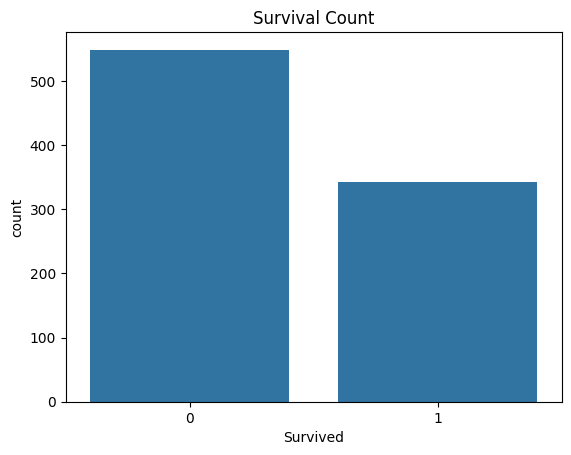

In [16]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()


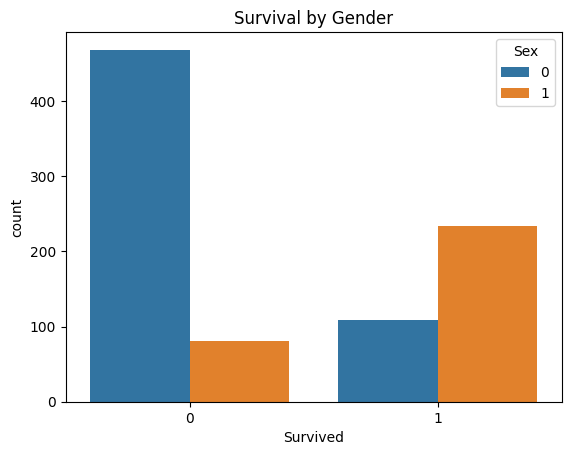

In [17]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()


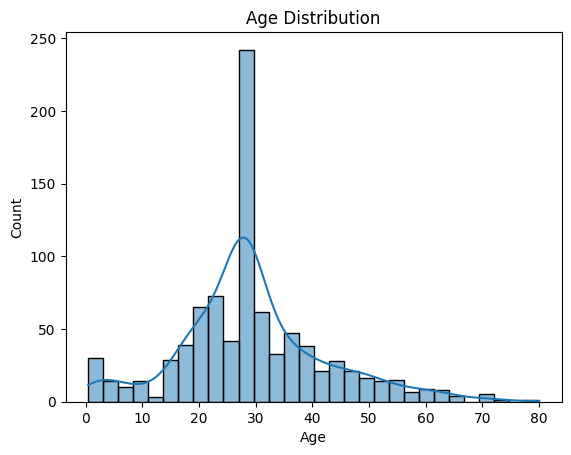

In [18]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


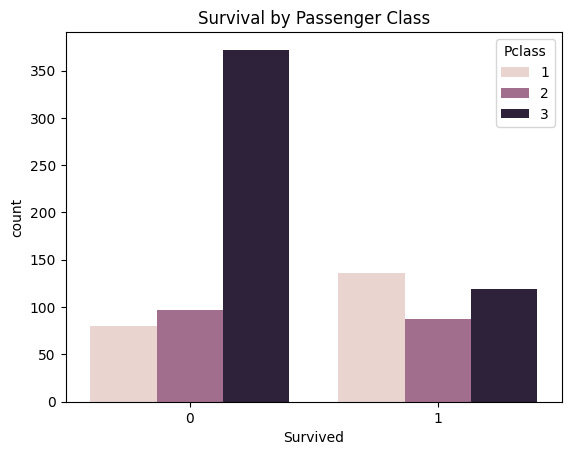

In [19]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()


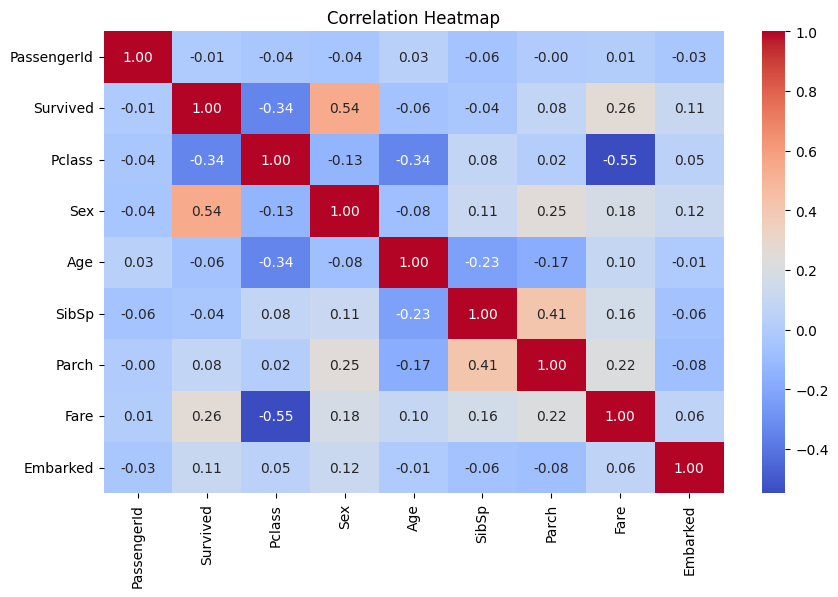

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [21]:
print("Survival Rate by Gender:\n", df.groupby('Sex')['Survived'].mean())
print("\nSurvival Rate by Passenger Class:\n", df.groupby('Pclass')['Survived'].mean())
print("\nAverage Age by Survival Status:\n", df.groupby('Survived')['Age'].mean())


Survival Rate by Gender:
 Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

Survival Rate by Passenger Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Average Age by Survival Status:
 Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64


In [22]:
df.to_csv('cleaned_titanic.csv', index=False)
print("Cleaned file saved.")


Cleaned file saved.
